In [6]:
import pandas as pd #data manpulation 
import numpy as np #arrays 
import matplotlib.pyplot as plt #plotting 
from sklearn.metrics import  confusion_matrix #evalution 
from sklearn.model_selection import train_test_split #splitting probabilty 

import os #access desktop 
import cv2 #image manputlaion 


# model building 
import tensorflow 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate
from tensorflow.keras.models import Model

In [7]:
train_path = r"C:\Users\ziadg\Desktop\Brain_Train"
test_path = r"C:\Users\ziadg\Desktop\Brain_test"

labels = {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

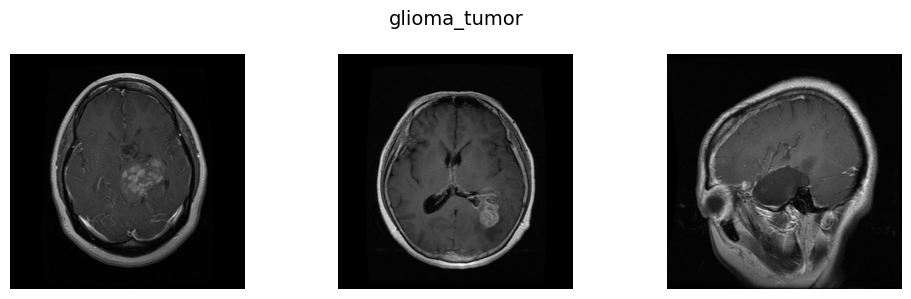

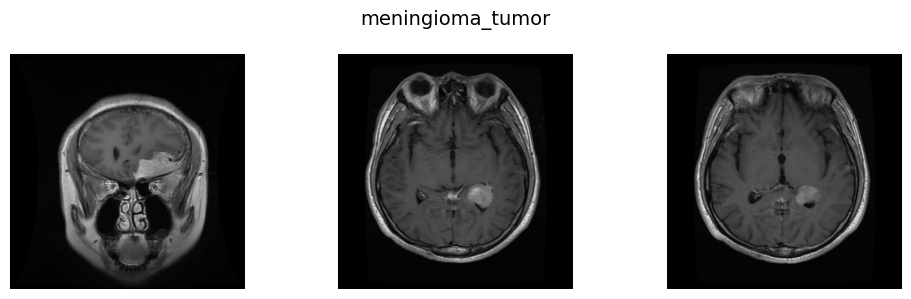

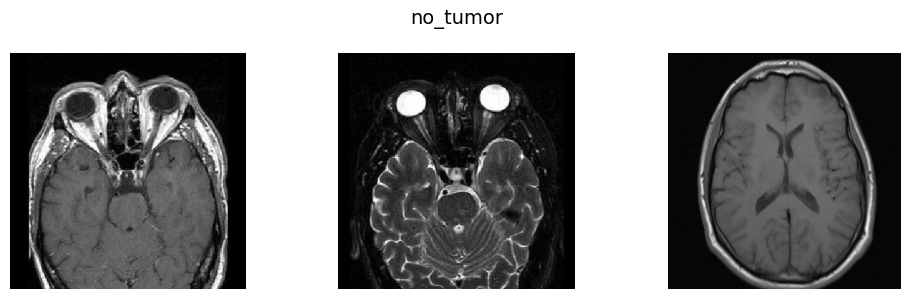

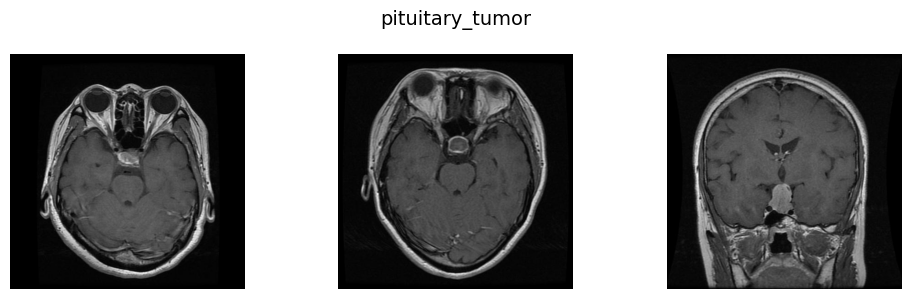

In [8]:
def display_samples(data_path, labels, num_samples=3):
    for label in labels: 
        images = [cv2.imread(os.path.join(data_path, label, img), cv2.IMREAD_GRAYSCALE) # reading the data from the path 
                  for img in os.listdir(os.path.join(data_path, label))[:num_samples]] 
        #plot sample of the data 
        plt.figure(figsize=(10, 3))
        for i, img in enumerate(images):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(img, cmap="gray")
            plt.axis("off")
        plt.suptitle(label, fontsize=14)
        plt.tight_layout()
        plt.show()

display_samples(train_path, labels)

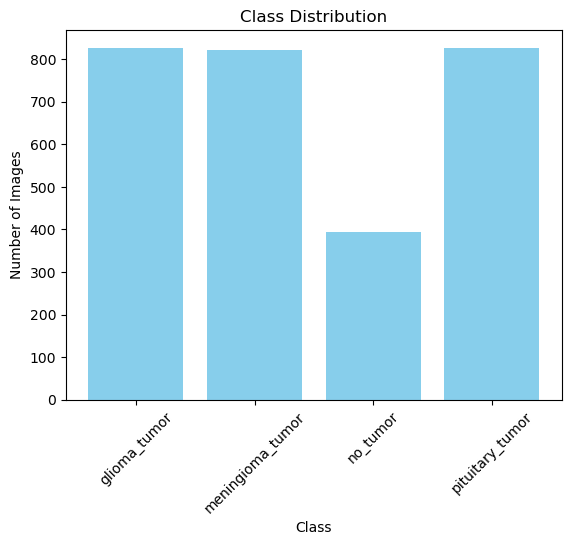

In [9]:
def class_counts(data_path, labels):
    counts = [] # store count data 
    for label in labels:
        counts.append(len(os.listdir(os.path.join(data_path, label)))) # acces data path 
    
    plt.bar(labels.keys(), counts, color='skyblue')
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45)
    plt.show()

class_counts(train_path, labels)

In [10]:
def load_images(data_path, labels, target_size=(224, 224)):
    images = [] # store images 
    classes = [] # store labels 
    for label, class_index in labels.items(): 
        class_path = os.path.join(data_path, label)  
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)   
            img = cv2.resize(img, target_size)  
            images.append(img)
            classes.append(class_index)  
    images = np.array(images, dtype='float32')   # convert to numpy arrays 
    classes = np.array(classes)  
    return images, classes

train_images, train_labels = load_images(train_path, labels)
test_images, test_labels = load_images(test_path, labels)

In [11]:
# image normalization  [0,255] >>> [0,1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (2870, 224, 224)
Train labels shape: (2870,)
Test images shape: (394, 224, 224)
Test labels shape: (394,)


In [13]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.3, random_state=42)

In [14]:
# convert the arrays to categorical
train_labels = to_categorical(train_labels, num_classes=len(labels))
val_labels = to_categorical(val_labels, num_classes=len(labels))
test_labels = to_categorical(test_labels, num_classes=len(labels))

In [33]:
#cnn model 
model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)), # layer 1 
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'), #layer 2 
    MaxPooling2D(pool_size=(2, 2)),
    
    # fully connected 
    Flatten(), # convert 2d arrays to 1d 
    Dense(128, activation='relu'),
    Dropout(0.5),  # prevents overfitting 
    Dense(4, activation='softmax')   # output layer 4 for each class

model.compile(
    optimizer='adam', #lr = 0.01
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 186624)            0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [34]:
#model training 
trained_model = model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=10,
    batch_size=32
)


Epoch 1/10
72/72 [==============================] - 84s 1s/step - loss: 1.0758 - accuracy: 0.5505 - precision: 0.6395 - recall: 0.3284 - val_loss: 0.6765 - val_accuracy: 0.7073 - val_precision: 0.7839 - val_recall: 0.6446
Epoch 2/10
72/72 [==============================] - 79s 1s/step - loss: 0.5908 - accuracy: 0.7639 - precision: 0.7911 - recall: 0.7078 - val_loss: 0.5621 - val_accuracy: 0.7544 - val_precision: 0.7864 - val_recall: 0.7247
Epoch 3/10
72/72 [==============================] - 83s 1s/step - loss: 0.3902 - accuracy: 0.8554 - precision: 0.8713 - recall: 0.8288 - val_loss: 0.4448 - val_accuracy: 0.8153 - val_precision: 0.8267 - val_recall: 0.7979
Epoch 4/10
72/72 [==============================] - 85s 1s/step - loss: 0.2731 - accuracy: 0.9007 - precision: 0.9099 - recall: 0.8881 - val_loss: 0.3741 - val_accuracy: 0.8519 - val_precision: 0.8592 - val_recall: 0.8502
Epoch 5/10
72/72 [==============================] - 86s 1s/step - loss: 0.1753 - accuracy: 0.9321 - precision: 0

In [37]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_images, test_labels)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


13/13 [==============================] - 2s 170ms/step - loss: 3.8610 - accuracy: 0.7056 - precision: 0.7121 - recall: 0.7030
Test Loss: 3.8610
Test Accuracy: 0.7056
Test Precision: 0.7121
Test Recall: 0.7030


In [39]:
from sklearn.metrics import classification_report
test_predictions = model.predict(test_images)
test_pred_labels = np.argmax(test_predictions, axis=1)
test_true_labels = np.argmax(test_labels, axis=1)
print(classification_report(test_true_labels, test_pred_labels, target_names=labels))

13/13 [==============================] - 2s 179ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.95      0.20      0.33       100
meningioma_tumor       0.63      0.94      0.76       115
        no_tumor       0.70      0.95      0.81       105
 pituitary_tumor       0.85      0.68      0.75        74

        accuracy                           0.71       394
       macro avg       0.78      0.69      0.66       394
    weighted avg       0.77      0.71      0.66       394

